In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')
from pandas.api.types import is_numeric_dtype

pd.options.display.max_columns=999

In [2]:
data=pd.read_csv('train.csv',index_col='ID')


In [3]:
data.head(10)

,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,
0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",8,4,9.27,4.0,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172331195294,!@9#%8,340.4792117872438,Good
0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,8_,11.27,4.0,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
0x1609,CUS_0xd40,August,NaN,23,#F%$D@*&8,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,6,11.27,4.0,Good,809.98,23.933795,NaN,No,49.574949,24.785216509052056,High_spent_Medium_value_payments,358.12416760938714,Standard
0x160e,CUS_0x21b1,January,Rick Rothackerj,28_,004-07-5839,_______,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,3,4,5.42,2.0,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 0x1602 to 0x25fed
Data columns (total 27 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Customer_ID               100000 non-null  object 
 1   Month                     100000 non-null  object 
 2   Name                      90015 non-null   object 
 3   Age                       100000 non-null  object 
 4   SSN                       100000 non-null  object 
 5   Occupation                100000 non-null  object 
 6   Annual_Income             100000 non-null  object 
 7   Monthly_Inhand_Salary     84998 non-null   float64
 8   Num_Bank_Accounts         100000 non-null  int64  
 9   Num_Credit_Card           100000 non-null  int64  
 10  Interest_Rate             100000 non-null  int64  
 11  Num_of_Loan               100000 non-null  object 
 12  Type_of_Loan              88592 non-null   object 
 13  Delay_from_due_date       100000 non-null  

***The data seems to have lot of error and unrealistic values which needs to be cleaned up.***
***Few pointers we can infer from the above data:***
1. Various Features with the target variable being the Credit Score having 3 Classes-Good,Poor,Standard
2. Various Indetification based Columns like Customer_ID,Name,ID,SSN.This aspect could be used to fill the missing values 
3. Data Cleaning as some values seem to be unrealisitic like #F%$D@*&8

## Data Cleaning

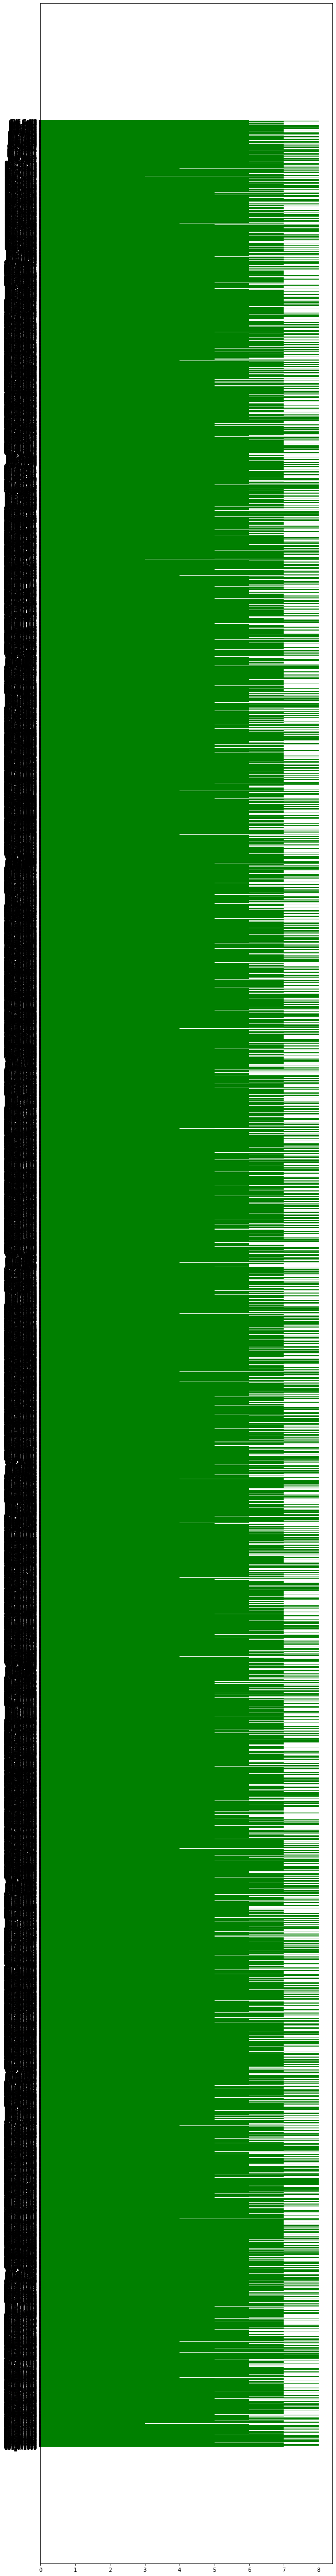

In [5]:
grp=data.groupby(['Customer_ID'])['Name'].count()
N=len(grp.index)
ind=np.arange(N)
width=1
plt.figure(figsize=(10,90))
p1=plt.barh(ind,grp.values,width,color='green')
plt.yticks(ind,(grp.index))
plt.show()



In [6]:
print('The Total Number of Customers are:',N)
print('The minimum frequency of any Customer is:',np.min(grp.values))
print('The maximum frequency of any Customer is:',np.max(grp.values))

The Total Number of Customers are: 12500
The minimum frequency of any Customer is: 3
The maximum frequency of any Customer is: 8


***The above plot shows the data being grouped on Customer ID. The inferences from it are:***
  1. The data is of total-12500 Customers who have taken various types of Loan
  2. The missing column could be filled with the information given in another rows related to same Customer
  3. SSN Column would then be redundant as Customer ID column can act as Unique Identifier which could be used to identify customers
  4. A Customer have minimum-3 and maximum-8 recorded related Rows 
  5. The Name and SSN column becomes Redundant as it is the Customer ID which could be used to Clean and operate on Data.

In [7]:
#Dropping Name and SSN Column
data.drop(['Name','SSN'],axis=1,inplace=True)

In [8]:
data.head(10)

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
ID,,,,,,,,,,,,,,,,,,,,,,,,,
0x1602,CUS_0xd40,January,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
0x1603,CUS_0xd40,February,23,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
0x1604,CUS_0xd40,March,-500,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
0x1605,CUS_0xd40,April,23,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
0x1606,CUS_0xd40,May,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
0x1607,CUS_0xd40,June,23,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",8,4,9.27,4.0,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172331195294,!@9#%8,340.4792117872438,Good
0x1608,CUS_0xd40,July,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,8_,11.27,4.0,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
0x1609,CUS_0xd40,August,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,6,11.27,4.0,Good,809.98,23.933795,NaN,No,49.574949,24.785216509052056,High_spent_Medium_value_payments,358.12416760938714,Standard
0x160e,CUS_0x21b1,January,28_,_______,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,3,4,5.42,2.0,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard


##### There are many Numeric Columns which have corrupted Numeric Value by addition of  '_' to it. So we should try to correct it first.

In [9]:
col_to_modify=['Age','Annual_Income','Num_of_Loan','Num_of_Delayed_Payment','Changed_Credit_Limit','Outstanding_Debt',
              'Amount_invested_monthly','Monthly_Balance']
for i in col_to_modify:
    data[i]=data[i].astype(str).str.strip('_')


In [10]:
data.head(20)

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
ID,,,,,,,,,,,,,,,,,,,,,,,,,
0x1602,CUS_0xd40,January,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
0x1603,CUS_0xd40,February,23,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,nan,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
0x1604,CUS_0xd40,March,-500,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
0x1605,CUS_0xd40,April,23,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
0x1606,CUS_0xd40,May,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,nan,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
0x1607,CUS_0xd40,June,23,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",8,4,9.27,4.0,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172331195294,!@9#%8,340.4792117872438,Good
0x1608,CUS_0xd40,July,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,8,11.27,4.0,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
0x1609,CUS_0xd40,August,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,6,11.27,4.0,Good,809.98,23.933795,NaN,No,49.574949,24.785216509052056,High_spent_Medium_value_payments,358.12416760938714,Standard
0x160e,CUS_0x21b1,January,28,_______,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,3,4,5.42,2.0,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard


In [11]:
for i in data.columns:
    if (data[i].astype(str).str.find('@')!=(-1)).sum()>0:
        print('The Column {} has the (@) as a unique value'.format(i))
   

The Column Payment_Behaviour has the (@) as a unique value


In [12]:
data[(data['Payment_Behaviour'].astype(str).str.find('@')!=(-1))].sample(10)

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
ID,,,,,,,,,,,,,,,,,,,,,,,,,
0x23fa7,CUS_0xbda,February,42,Accountant,58644.12,5014.010000,6,5,21,2,"Credit-Builder Loan, and Credit-Builder Loan",34,15,14.5,11.0,Bad,2160.81,36.144874,18 Years and 8 Months,Yes,60.874831,413.97020220963884,!@9#%8,296.55596686916806,Poor
0x87e0,CUS_0x5a6d,March,18,Scientist,39891.42,3246.285000,4,4,22,6,"Auto Loan, Student Loan, Auto Loan, Payday Loa...",14,16,7.69,8.0,Standard,2411.32,31.535424,6 Years and 5 Months,NM,195.220369,nan,!@9#%8,220.23870145894398,Poor
0xf71c,CUS_0xba06,March,267,Developer,7464.64,391.053333,7,10,25,5,"Payday Loan, Auto Loan, Debt Consolidation Loa...",22,16,27.98,17.0,Bad,3802.67,25.635805,9 Years and 1 Months,Yes,21.845762,26.296835019038816,!@9#%8,280.9627360295561,Standard
0xe745,CUS_0xb196,April,49,Media_Manager,118297.6,10026.133333,2,1,9,3,"Payday Loan, Debt Consolidation Loan, and Auto...",8,4,10.97,7.0,Good,1446.83,21.276956,30 Years and 8 Months,No,264.092746,1270.8715226255956,!@9#%8,nan,Good
0x1b9e1,CUS_0x83a1,April,55,Lawyer,134328.90000000002,NaN,2,4,8,0,NaN,11,8,3.76,2.0,Good,579.41,33.699332,18 Years and 1 Months,No,0.000000,145.80078417525309,!@9#%8,1227.2067158247473,Standard
0x1fb6d,CUS_0x4f34,August,32,Teacher,43442.97,3748.247500,8,8,26,7,"Debt Consolidation Loan, Auto Loan, Personal L...",54,21,-0.9000000000000004,14.0,_,4225.97,30.531619,1 Years and 11 Months,Yes,249.964164,83.00690942942404,!@9#%8,281.8536766945065,Poor
0x8233,CUS_0x224a,February,55,Teacher,114929.01,9469.417500,2,3,2,3,"Personal Loan, Debt Consolidation Loan, and Pa...",9,0,-0.92,4.0,Good,742.14,25.533794,26 Years and 3 Months,No,206.874830,453.6916923586062,!@9#%8,566.3752276800012,Standard
0x22c8c,CUS_0x416f,July,18,Mechanic,169481.08,NaN,3,2,10,2,"Personal Loan, and Credit-Builder Loan",8,12,0.95,4.0,Good,645.14,38.641721,17 Years and 3 Months,No,168.928347,997.5078747664046,!@9#%8,534.4061116742745,Standard
0x10102,CUS_0x6f2d,May,48,Lawyer,71503.76,5672.646667,3,4,9,3,"Student Loan, Home Equity Loan, and Credit-Bui...",24,16,8.370000000000001,3.0,Standard,1254.71,26.851758,27 Years and 2 Months,Yes,110.850584,69.96553799713205,!@9#%8,636.4485445975033,Poor


***Will be replacing !@9#%8	by np.nan***


In [13]:
data['Payment_Behaviour']=np.where(data.Payment_Behaviour=='!@9#%8',np.NaN,data.Payment_Behaviour)

In [14]:
data[data.Payment_Behaviour.isnull()].head(2)

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
ID,,,,,,,,,,,,,,,,,,,,,,,,,
0x1607,CUS_0xd40,June,23,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",8,4,9.27,4.0,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172331195294,NaN,340.4792117872438,Good
0x161a,CUS_0x2dbc,January,34,_______,143162.64,12187.22,1,5,8,3,"Auto Loan, Auto Loan, and Not Specified",5,8,7.1,3.0,Good,1303.01,28.616735,17 Years and 9 Months,No,246.992319,168.413702679309,NaN,1043.3159778669492,Good


In [15]:
for i in data.columns:
    data[i]=np.where((data[i]=='nan') | (data[i]==''),np.NaN,data[i])

data[data.Num_of_Delayed_Payment.isnull()].head(2)

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
ID,,,,,,,,,,,,,,,,,,,,,,,,,
0x1603,CUS_0xd40,February,23,Scientist,19114.12,NaN,3.0,4.0,3.0,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1.0,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
0x1606,CUS_0xd40,May,23,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6.0,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [16]:
data.Age = data.Age.astype(int)
data.Annual_Income = data.Annual_Income.astype(float)
data.Num_of_Loan = data.Num_of_Loan.astype(int)
data.Num_of_Delayed_Payment = data.Num_of_Delayed_Payment.astype(float)
data.Changed_Credit_Limit = data.Changed_Credit_Limit.astype(float)
data.Outstanding_Debt = data.Outstanding_Debt.astype(float)
data.Amount_invested_monthly = data.Amount_invested_monthly.astype(float)
data.Monthly_Balance = data.Monthly_Balance.astype(float)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 0x1602 to 0x25fed
Data columns (total 25 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Customer_ID               100000 non-null  object 
 1   Month                     100000 non-null  object 
 2   Age                       100000 non-null  int64  
 3   Occupation                100000 non-null  object 
 4   Annual_Income             100000 non-null  float64
 5   Monthly_Inhand_Salary     84998 non-null   float64
 6   Num_Bank_Accounts         100000 non-null  float64
 7   Num_Credit_Card           100000 non-null  float64
 8   Interest_Rate             100000 non-null  float64
 9   Num_of_Loan               100000 non-null  int64  
 10  Type_of_Loan              88592 non-null   object 
 11  Delay_from_due_date       100000 non-null  float64
 12  Num_of_Delayed_Payment    92998 non-null   float64
 13  Changed_Credit_Limit      97909 non-null   

***Cleaned the Data, Let's refine it by Handling Missing Values with the related rows and Customer ID***

In [82]:
data.head(10)

,Customer_ID,Age,Occupation,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Credit_Score,Bal/Salary
ID,,,,,,,,,,,,,,,,,,,,,,,
0x1602,12320,23.0,12,1824.843333,3.0,4.0,3.0,4,128,3.0,6.5,11.27,4.0,1,809.98,26.822620,22.083333,1,49.574949,81.057408,2,0,0.176372
0x1603,12320,23.0,12,1824.843333,3.0,4.0,3.0,4,128,-1.0,6.5,11.27,4.0,1,809.98,31.944960,22.166667,1,49.574949,81.057408,3,0,0.176372
0x1604,12320,23.0,12,1824.843333,3.0,4.0,3.0,4,128,3.0,6.5,11.27,4.0,1,809.98,28.609352,22.250000,1,49.574949,81.057408,4,0,0.176372
0x1605,12320,23.0,12,1824.843333,3.0,4.0,3.0,4,128,5.0,6.5,6.27,4.0,1,809.98,31.377862,22.333333,1,49.574949,81.057408,5,0,0.176372
0x1606,12320,23.0,12,1824.843333,3.0,4.0,3.0,4,128,6.0,6.5,11.27,4.0,1,809.98,24.797347,22.416667,1,49.574949,81.057408,1,0,0.176372
0x1607,12320,23.0,12,1824.843333,3.0,4.0,3.0,4,128,8.0,6.5,9.27,4.0,1,809.98,27.262259,22.500000,1,49.574949,81.057408,1,0,0.176372
0x1608,12320,23.0,12,1824.843333,3.0,4.0,3.0,4,128,3.0,6.5,11.27,4.0,1,809.98,22.537593,22.583333,1,49.574949,81.057408,5,0,0.176372
0x1609,12320,23.0,12,1824.843333,3.0,4.0,3.0,4,128,3.0,6.5,11.27,4.0,1,809.98,23.933795,22.666667,1,49.574949,81.057408,1,2,0.176372
0x160e,1066,28.0,13,3037.986667,2.0,4.0,6.0,1,684,3.0,2.0,5.42,2.0,1,605.03,24.464031,26.083333,1,18.816215,84.704001,5,2,0.153415


In [19]:
missing_num_col=[col for col in data.select_dtypes(include=['int','float']).columns
                 if data[col].isnull().sum()>0]

missing_num_col

['Monthly_Inhand_Salary',
 'Num_of_Delayed_Payment',
 'Changed_Credit_Limit',
 'Num_Credit_Inquiries',
 'Amount_invested_monthly',
 'Monthly_Balance']

In [20]:
for col in missing_num_col:
        data[col]=(data.groupby('Customer_ID'))[col].apply(lambda x:x.fillna(x.median()))
    

In [21]:
data.head(10)

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
ID,,,,,,,,,,,,,,,,,,,,,,,,,
0x1602,CUS_0xd40,January,23,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7.0,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
0x1603,CUS_0xd40,February,23,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1.0,6.5,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
0x1604,CUS_0xd40,March,-500,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7.0,11.27,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
0x1605,CUS_0xd40,April,23,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5.0,4.0,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
0x1606,CUS_0xd40,May,23,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6.0,6.5,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good
0x1607,CUS_0xd40,June,23,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",8.0,4.0,9.27,4.0,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172,NaN,340.479212,Good
0x1608,CUS_0xd40,July,23,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,8.0,11.27,4.0,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.344067,Low_spent_Small_value_payments,244.565317,Good
0x1609,CUS_0xd40,August,23,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,6.0,11.27,4.0,Good,809.98,23.933795,NaN,No,49.574949,24.785217,High_spent_Medium_value_payments,358.124168,Standard
0x160e,CUS_0x21b1,January,28,_______,34847.84,3037.986667,2.0,4.0,6.0,1,Credit-Builder Loan,3.0,4.0,5.42,2.0,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825,Low_spent_Small_value_payments,470.690627,Standard


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 0x1602 to 0x25fed
Data columns (total 25 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Customer_ID               100000 non-null  object 
 1   Month                     100000 non-null  object 
 2   Age                       100000 non-null  int64  
 3   Occupation                100000 non-null  object 
 4   Annual_Income             100000 non-null  float64
 5   Monthly_Inhand_Salary     100000 non-null  float64
 6   Num_Bank_Accounts         100000 non-null  float64
 7   Num_Credit_Card           100000 non-null  float64
 8   Interest_Rate             100000 non-null  float64
 9   Num_of_Loan               100000 non-null  int64  
 10  Type_of_Loan              88592 non-null   object 
 11  Delay_from_due_date       100000 non-null  float64
 12  Num_of_Delayed_Payment    100000 non-null  float64
 13  Changed_Credit_Limit      100000 non-null  

In [23]:
for col in ['Credit_History_Age','Payment_Behaviour']:
    data[col]=data.groupby(['Customer_ID'])[col].apply(lambda x: x.fillna(x.mode()[0]))

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 0x1602 to 0x25fed
Data columns (total 25 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Customer_ID               100000 non-null  object 
 1   Month                     100000 non-null  object 
 2   Age                       100000 non-null  int64  
 3   Occupation                100000 non-null  object 
 4   Annual_Income             100000 non-null  float64
 5   Monthly_Inhand_Salary     100000 non-null  float64
 6   Num_Bank_Accounts         100000 non-null  float64
 7   Num_Credit_Card           100000 non-null  float64
 8   Interest_Rate             100000 non-null  float64
 9   Num_of_Loan               100000 non-null  int64  
 10  Type_of_Loan              88592 non-null   object 
 11  Delay_from_due_date       100000 non-null  float64
 12  Num_of_Delayed_Payment    100000 non-null  float64
 13  Changed_Credit_Limit      100000 non-null  

* Basically there are groups of Customer ID in Types of Loans where there is only Null values. Because of this the above method was not applicable on it
* Therefore I would first assign- 'Unspecified' value to Nan and then will apply the Mode on Customer ID 

In [25]:
data["Type_of_Loan"]=np.where(data.Type_of_Loan.isnull()==True,'Unspecified',data['Type_of_Loan'])

data['Type_of_Loan']=data.groupby('Customer_ID')['Type_of_Loan'].apply(lambda x: x.fillna(x.mode()[0]))

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 0x1602 to 0x25fed
Data columns (total 25 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Customer_ID               100000 non-null  object 
 1   Month                     100000 non-null  object 
 2   Age                       100000 non-null  int64  
 3   Occupation                100000 non-null  object 
 4   Annual_Income             100000 non-null  float64
 5   Monthly_Inhand_Salary     100000 non-null  float64
 6   Num_Bank_Accounts         100000 non-null  float64
 7   Num_Credit_Card           100000 non-null  float64
 8   Interest_Rate             100000 non-null  float64
 9   Num_of_Loan               100000 non-null  int64  
 10  Type_of_Loan              100000 non-null  object 
 11  Delay_from_due_date       100000 non-null  float64
 12  Num_of_Delayed_Payment    100000 non-null  float64
 13  Changed_Credit_Limit      100000 non-null  

In [27]:
data.head(10)

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
ID,,,,,,,,,,,,,,,,,,,,,,,,,
0x1602,CUS_0xd40,January,23,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7.0,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
0x1603,CUS_0xd40,February,23,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1.0,6.5,11.27,4.0,Good,809.98,31.944960,22 Years and 1 Months,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
0x1604,CUS_0xd40,March,-500,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7.0,11.27,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
0x1605,CUS_0xd40,April,23,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5.0,4.0,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
0x1606,CUS_0xd40,May,23,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6.0,6.5,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good
0x1607,CUS_0xd40,June,23,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",8.0,4.0,9.27,4.0,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172,High_spent_Medium_value_payments,340.479212,Good
0x1608,CUS_0xd40,July,23,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,8.0,11.27,4.0,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.344067,Low_spent_Small_value_payments,244.565317,Good
0x1609,CUS_0xd40,August,23,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,6.0,11.27,4.0,Good,809.98,23.933795,22 Years and 1 Months,No,49.574949,24.785217,High_spent_Medium_value_payments,358.124168,Standard
0x160e,CUS_0x21b1,January,28,_______,34847.84,3037.986667,2.0,4.0,6.0,1,Credit-Builder Loan,3.0,4.0,5.42,2.0,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825,Low_spent_Small_value_payments,470.690627,Standard


***Missing Values Handled Suitably***

In [28]:
for col in data.columns:
    if (data[col].astype(str).str.find('_______')!=(-1)).sum()>0:
        print('Column with _______ found:',col)
    if (data[col].astype(str).str.find('_')!=(-1)).sum()>0:
        print('Column with _ found:',col)

Column with _ found: Customer_ID
Column with _______ found: Occupation
Column with _ found: Occupation
Column with _ found: Credit_Mix
Column with _ found: Payment_Behaviour


In [29]:
data.loc[(data.Occupation=='_______') | (data.Occupation=='_')|(data.Credit_Mix=='_')|(data.Payment_Behaviour=='_')
         ,data.columns].head(20)

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
ID,,,,,,,,,,,,,,,,,,,,,,,,,
0x1602,CUS_0xd40,January,23,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7.0,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
0x160e,CUS_0x21b1,January,28,_______,34847.84,3037.986667,2.0,4.0,6.0,1,Credit-Builder Loan,3.0,4.0,5.42,2.0,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825,Low_spent_Small_value_payments,470.690627,Standard
0x1610,CUS_0x21b1,March,28,Teacher,34847.84,3037.986667,2.0,1385.0,6.0,1,Credit-Builder Loan,3.0,-1.0,5.42,2.0,_,605.03,33.224951,26 Years and 9 Months,No,18.816215,58.515976,High_spent_Large_value_payments,466.466476,Standard
0x161a,CUS_0x2dbc,January,34,_______,143162.64,12187.220000,1.0,5.0,8.0,3,"Auto Loan, Auto Loan, and Not Specified",5.0,8.0,7.10,3.0,Good,1303.01,28.616735,17 Years and 9 Months,No,246.992319,168.413703,High_spent_Small_value_payments,1043.315978,Good
0x161c,CUS_0x2dbc,March,34,_______,143162.64,12187.220000,1.0,5.0,8.0,3,"Auto Loan, Auto Loan, and Not Specified",8.0,7.0,11.10,3.0,Good,1303.01,26.519815,17 Years and 11 Months,No,246.992319,10000.000000,High_spent_Small_value_payments,715.741367,Good
0x161d,CUS_0x2dbc,April,34,Engineer,143162.64,12187.220000,1.0,5.0,8.0,3,"Auto Loan, Auto Loan, and Not Specified",8.0,5.0,9.10,3.0,_,1303.01,39.501648,17 Years and 10 Months,No,246.992319,825.216270,Low_spent_Medium_value_payments,426.513411,Good
0x161e,CUS_0x2dbc,May,34,_______,143162.64,12187.220000,1.0,5.0,8.0,3,"Auto Loan, Auto Loan, and Not Specified",10.0,5.0,7.10,3.0,Good,1303.01,31.376150,18 Years and 1 Months,No,246.992319,430.947528,Low_spent_Large_value_payments,810.782153,Good
0x162b,CUS_0xb891,June,55,_______,30689.89,2612.490833,2.0,5.0,4.0,1,Not Specified,5.0,6.0,-3.01,4.0,_,632.46,27.445422,17 Years and 8 Months,No,16.415452,84.952848,High_spent_Small_value_payments,419.880784,Standard
0x1635,CUS_0x1cdb,April,21,Developer,35547.71,2853.309167,7.0,5.0,5.0,0,Unspecified,1.0,15.0,2.58,4.0,_,943.86,28.924954,30 Years and 11 Months,Yes,0.000000,96.785485,High_spent_Medium_value_payments,438.545432,Standard


* '_' in Occupation seems to be a valid presence related to Media_Manager


In [30]:
#Just to cross check the presence of '_' in Occupation

data.loc[((data.Occupation.astype(str).str.find('_')!=-1)==True),:].head(20)

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
ID,,,,,,,,,,,,,,,,,,,,,,,,,
0x160e,CUS_0x21b1,January,28,_______,34847.840,3037.986667,2.0,4.0,6.0,1,Credit-Builder Loan,3.0,4.0,5.42,2.0,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825,Low_spent_Small_value_payments,470.690627,Standard
0x161a,CUS_0x2dbc,January,34,_______,143162.640,12187.220000,1.0,5.0,8.0,3,"Auto Loan, Auto Loan, and Not Specified",5.0,8.0,7.10,3.0,Good,1303.01,28.616735,17 Years and 9 Months,No,246.992319,168.413703,High_spent_Small_value_payments,1043.315978,Good
0x161c,CUS_0x2dbc,March,34,_______,143162.640,12187.220000,1.0,5.0,8.0,3,"Auto Loan, Auto Loan, and Not Specified",8.0,7.0,11.10,3.0,Good,1303.01,26.519815,17 Years and 11 Months,No,246.992319,10000.000000,High_spent_Small_value_payments,715.741367,Good
0x161e,CUS_0x2dbc,May,34,_______,143162.640,12187.220000,1.0,5.0,8.0,3,"Auto Loan, Auto Loan, and Not Specified",10.0,5.0,7.10,3.0,Good,1303.01,31.376150,18 Years and 1 Months,No,246.992319,430.947528,Low_spent_Large_value_payments,810.782153,Good
0x162b,CUS_0xb891,June,55,_______,30689.890,2612.490833,2.0,5.0,4.0,1,Not Specified,5.0,6.0,-3.01,4.0,_,632.46,27.445422,17 Years and 8 Months,No,16.415452,84.952848,High_spent_Small_value_payments,419.880784,Standard
0x163f,CUS_0x95ee,February,31,_______,73928.460,5988.705000,4.0,5.0,8.0,0,Unspecified,8.0,7.0,10.14,2.0,Good,548.20,42.769864,32 Years and 0 Months,NM,0.000000,172.939214,Low_spent_Medium_value_payments,705.931286,Good
0x1656,CUS_0x5407,January,7580,Media_Manager,34081.380,2611.115000,8.0,7.0,15.0,3,"Not Specified, Auto Loan, and Student Loan",30.0,11.0,17.13,5.0,Standard,1704.18,24.448063,14 Years and 10 Months,NM,70.478333,162.441009,Low_spent_Large_value_payments,298.192158,Poor
0x1657,CUS_0x5407,February,30,Media_Manager,34081.380,2611.115000,8.0,7.0,15.0,3,"Not Specified, Auto Loan, and Student Loan",30.0,14.0,17.13,5.0,_,1704.18,35.171160,14 Years and 8 Months,Yes,70.478333,38.436983,High_spent_Large_value_payments,392.196185,Poor
0x1658,CUS_0x5407,March,30,Media_Manager,34081.380,2611.115000,8.0,7.0,15.0,3,"Not Specified, Auto Loan, and Student Loan",31.0,14.0,17.13,5.0,Standard,1704.18,35.111552,14 Years and 9 Months,Yes,70.478333,199.720765,Low_spent_Large_value_payments,260.912402,Poor


***Therefore,would be focusing on '____' in Occupation***

In [31]:
data.Occupation=np.where(data.Occupation=='_______','Unknown',data.Occupation)



data.Occupation=data.groupby(['Customer_ID'])['Occupation'].apply(lambda x: x.replace('Unknown',x.mode()[0]))


In [32]:
for col in ['Credit_Mix','Payment_Behaviour']:
    
    data[col]=data.groupby(['Customer_ID'])[col].apply(lambda x: x.replace('_',x.mode()[0]))
            
            

In [33]:
data.head(20)

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
ID,,,,,,,,,,,,,,,,,,,,,,,,,
0x1602,CUS_0xd40,January,23,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7.0,11.27,4.0,Good,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
0x1603,CUS_0xd40,February,23,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1.0,6.5,11.27,4.0,Good,809.98,31.944960,22 Years and 1 Months,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
0x1604,CUS_0xd40,March,-500,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7.0,11.27,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
0x1605,CUS_0xd40,April,23,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5.0,4.0,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
0x1606,CUS_0xd40,May,23,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6.0,6.5,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good
0x1607,CUS_0xd40,June,23,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",8.0,4.0,9.27,4.0,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172,High_spent_Medium_value_payments,340.479212,Good
0x1608,CUS_0xd40,July,23,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,8.0,11.27,4.0,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.344067,Low_spent_Small_value_payments,244.565317,Good
0x1609,CUS_0xd40,August,23,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,6.0,11.27,4.0,Good,809.98,23.933795,22 Years and 1 Months,No,49.574949,24.785217,High_spent_Medium_value_payments,358.124168,Standard
0x160e,CUS_0x21b1,January,28,Teacher,34847.84,3037.986667,2.0,4.0,6.0,1,Credit-Builder Loan,3.0,4.0,5.42,2.0,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825,Low_spent_Small_value_payments,470.690627,Standard


                                        ***Data Cleaned***
_______________________________________________________________________

In [34]:
num_cols=data.select_dtypes(exclude=['object']).columns.tolist()

***Inspite of Cleaning of Data there appears to be certain non realistic values in certain numerica features which are
not possible. For Example- Age columns containing -500 value, Number of Credit Cards containing 1038 values***
* These value could be visualised in the form of outliers hence could be shown through various plots
* The aim is to correct these error in data storing by using identification from Customer_ID and then replacing them with the correct value

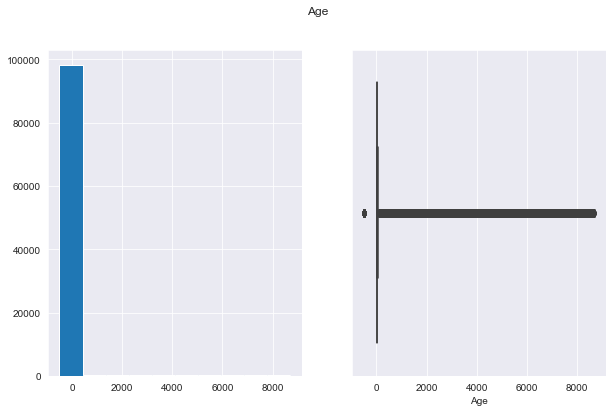

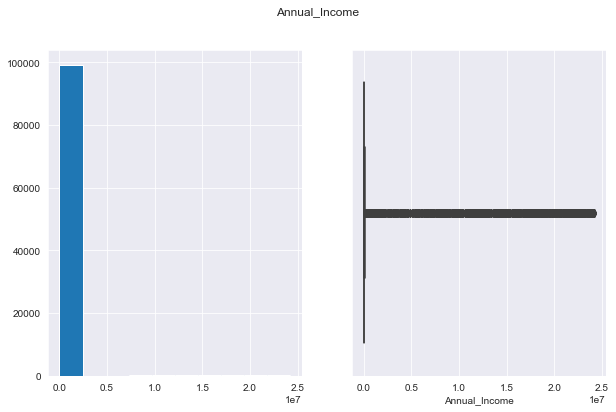

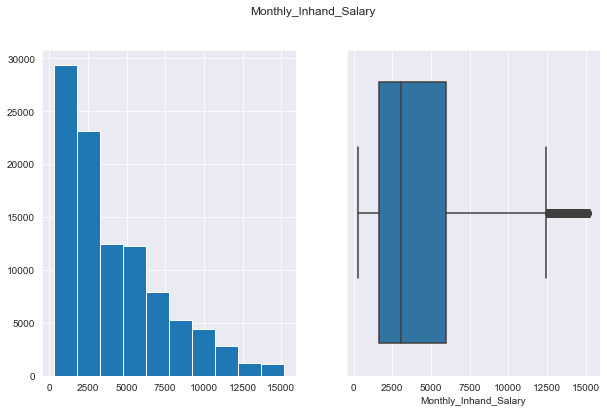

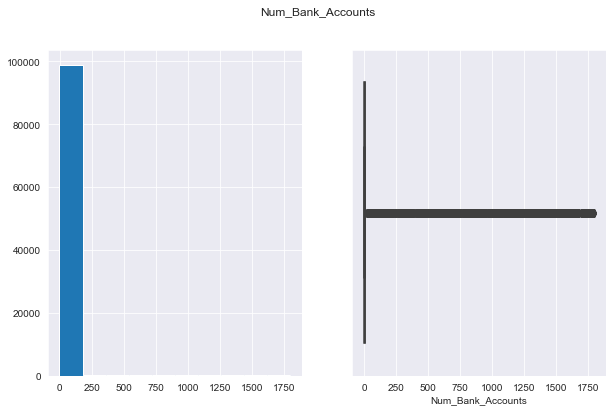

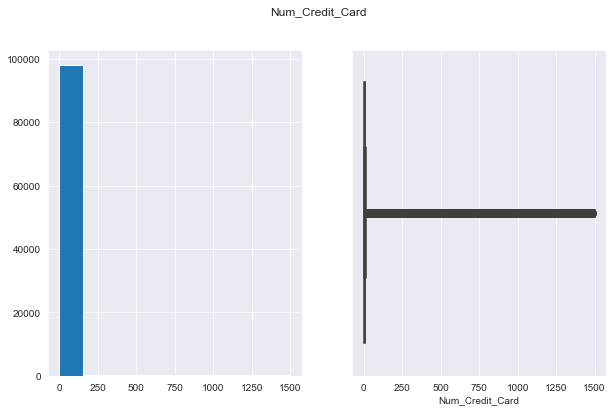

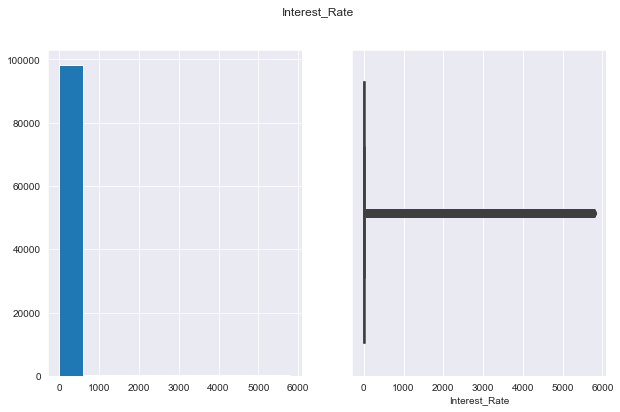

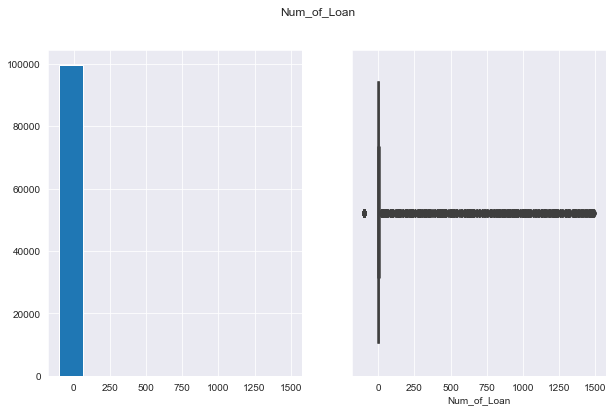

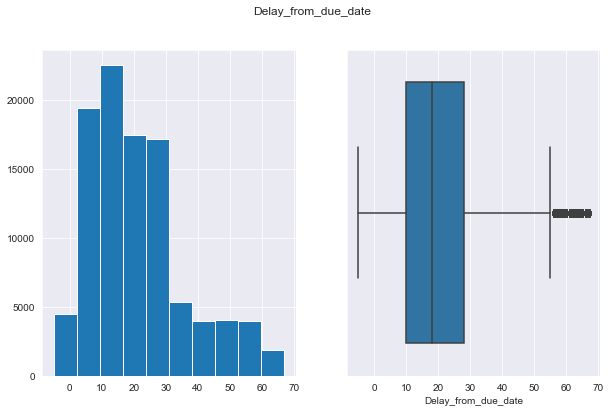

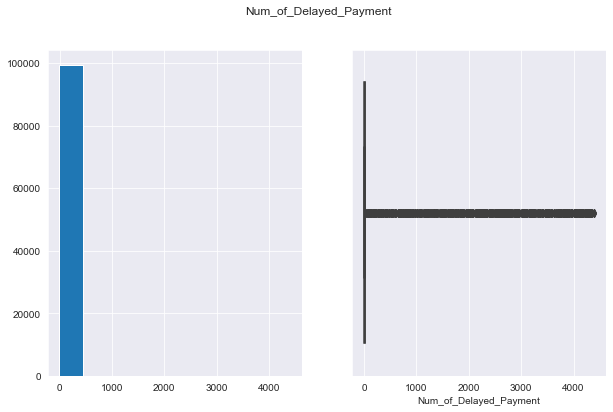

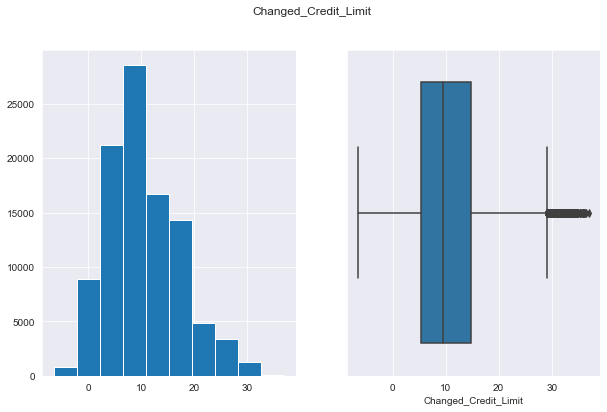

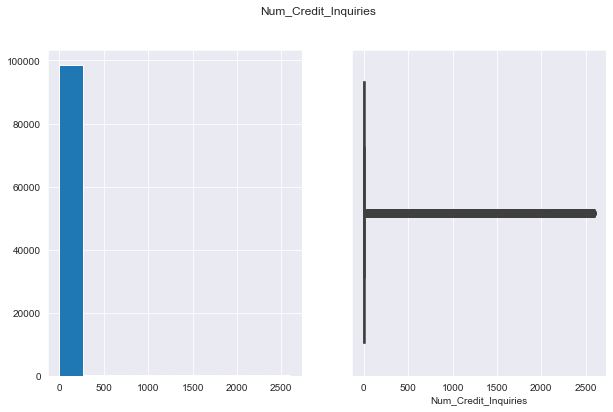

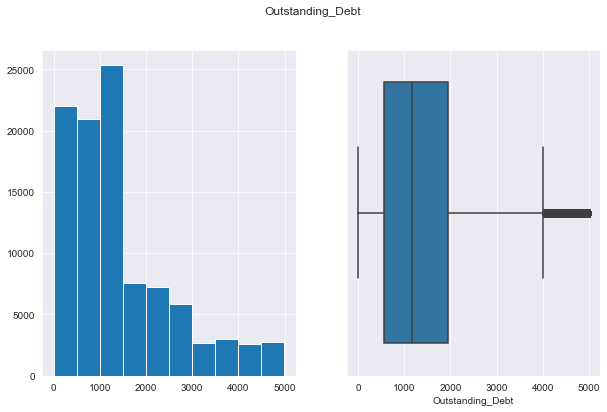

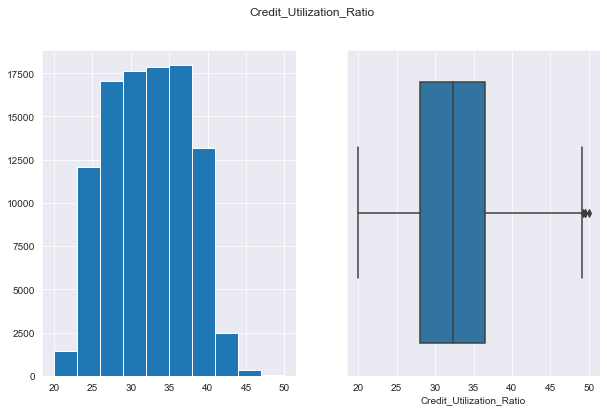

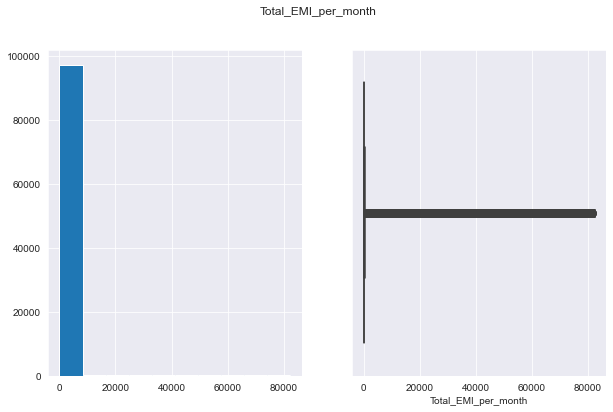

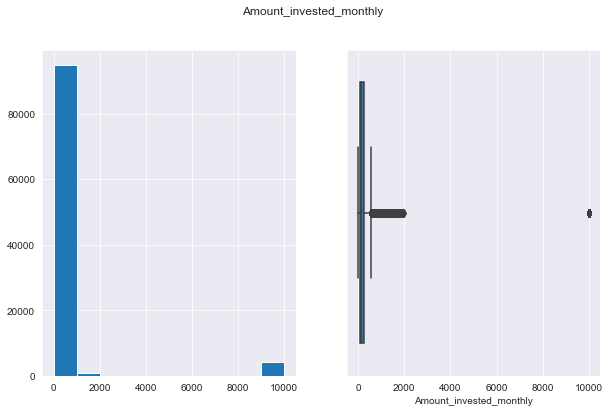

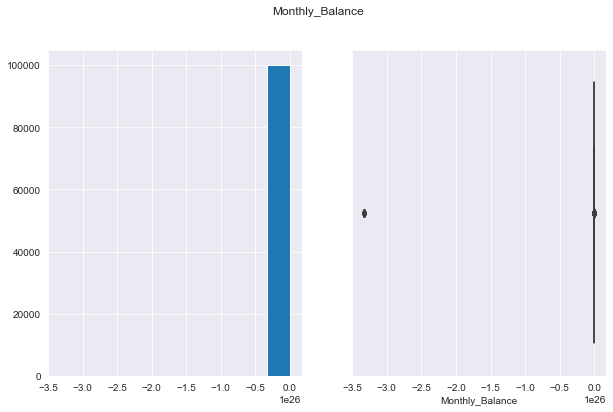

In [35]:
#Plotting the outliers + Distribution
sns.set_style(style='darkgrid')

for col in num_cols:
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    plt.hist(data[col])
    plt.subplot(1,2,2)
    sns.boxplot(data[col])
    plt.suptitle(col)
    plt.show()

***The above graph provide following Inferences:***
1. Many columns like Age,Annual Income,Number of Bank Accounts etc have a huge amount of outliers
2. But the Distribution of such features is concentrated in a range while other acting as outliers show the incorrect data 
3. Still there are features like Monthly Inhand Salary,Number of Delayed Payments,Changed credit Limit,Outstanding Debt and Credit Utilisation Ratio are more normally distributed and their outliers seems to be Realistic value

In [36]:
normal_col=['Monthly_Inhand_Salary','Delay_from_due_date','Changed_Credit_Limit','Outstanding_Debt',
           'Credit_Utilization_Ratio']
outlier_col=num_cols
for col in normal_col:
    outlier_col.remove(col)
outlier_col
    
    
    

['Age',
 'Annual_Income',
 'Num_Bank_Accounts',
 'Num_Credit_Card',
 'Interest_Rate',
 'Num_of_Loan',
 'Num_of_Delayed_Payment',
 'Num_Credit_Inquiries',
 'Total_EMI_per_month',
 'Amount_invested_monthly',
 'Monthly_Balance']

In [37]:
med=data.groupby(['Customer_ID'])['Age'].median()
med

Customer_ID
CUS_0x1000    17.0
CUS_0x1009    26.0
CUS_0x100b    18.5
CUS_0x1011    44.0
CUS_0x1013    44.0
              ... 
CUS_0xff3     55.0
CUS_0xff4     37.0
CUS_0xff6     19.0
CUS_0xffc     17.0
CUS_0xffd     29.0
Name: Age, Length: 12500, dtype: float64

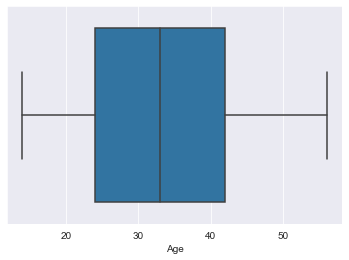

In [38]:
sns.boxplot(med)
plt.show()

***The above plot shows that if values are replaced by Median Value then the Outliers can be Handled appropriately.***


In [39]:
data.Age=data.groupby('Customer_ID')['Age'].apply(lambda x:x.replace([x],[x.median()]))

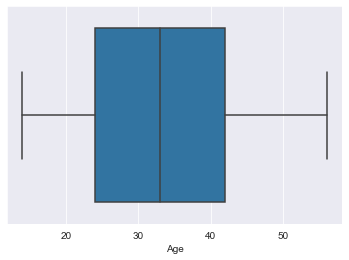

In [40]:
sns.boxplot(data.Age)
plt.show()

In [41]:
for col in outlier_col:
    data[col]=data.groupby(['Customer_ID'])[col].apply(lambda x: x.replace([x],[x.median()]))


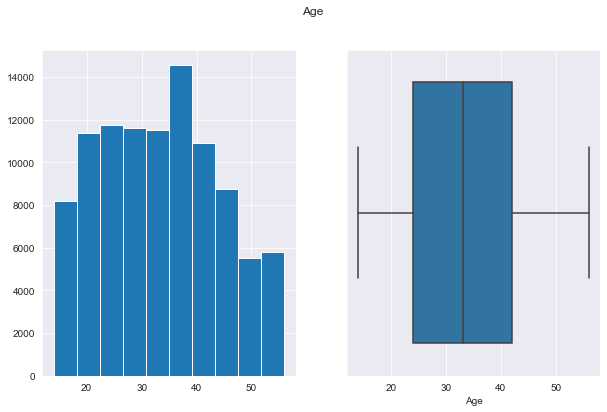

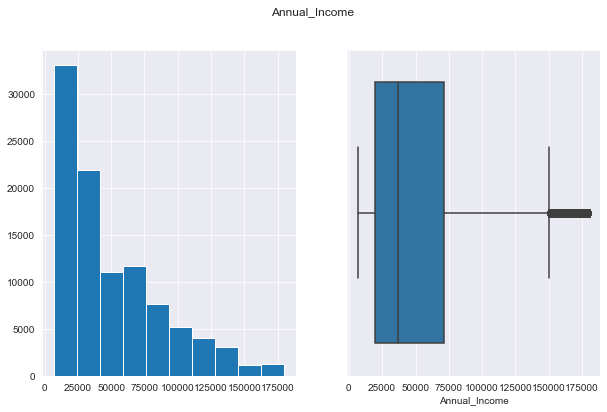

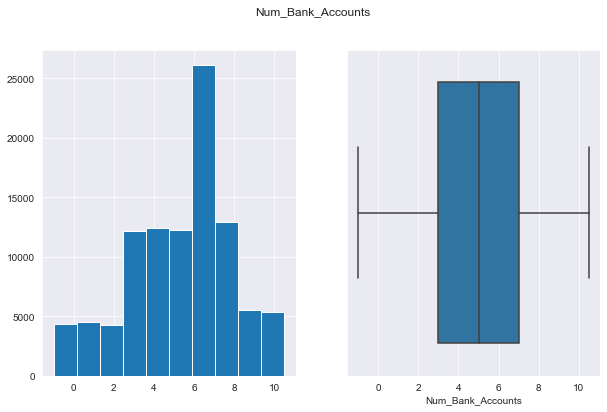

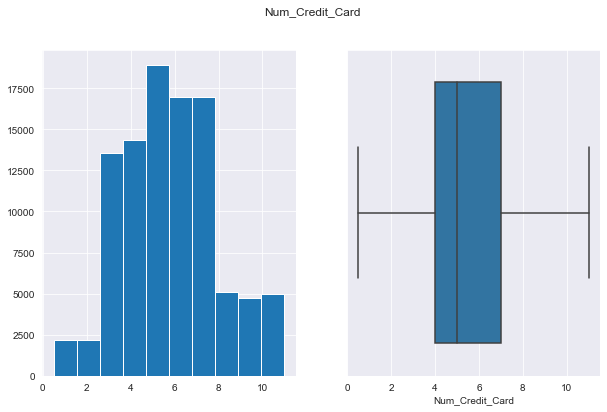

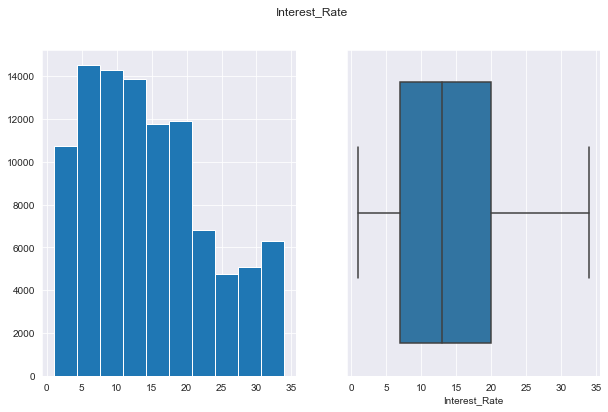

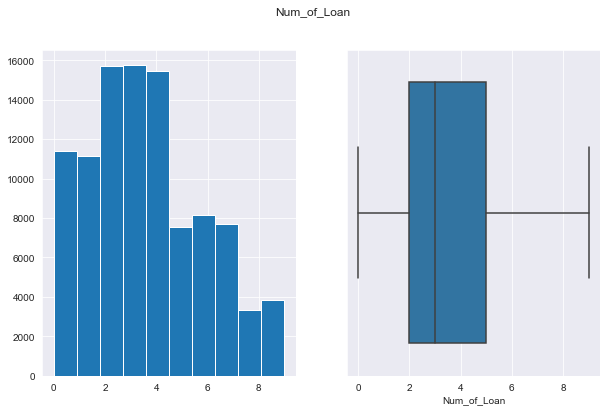

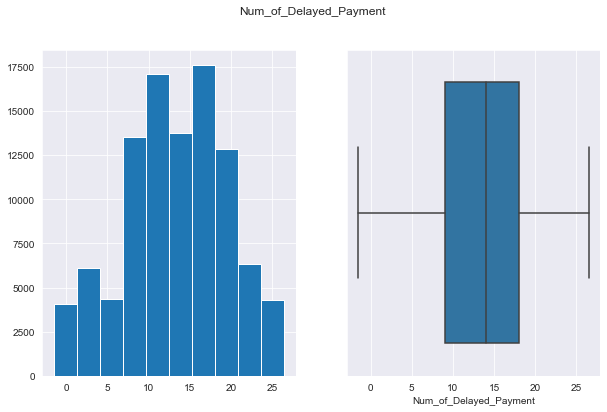

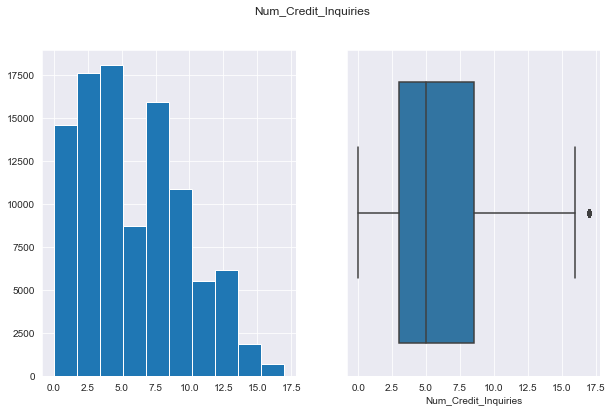

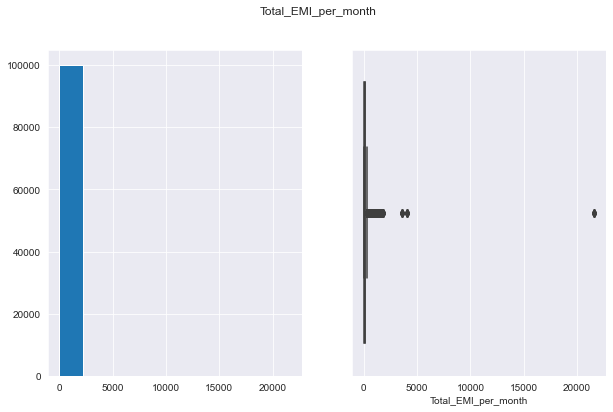

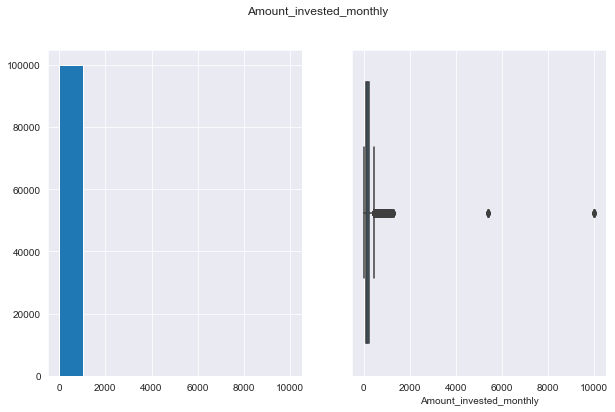

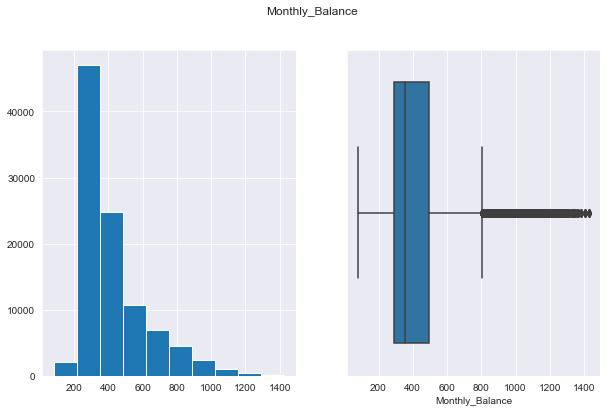

In [42]:
for col in outlier_col:
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    plt.hist(data[col])
    plt.subplot(1,2,2)
    sns.boxplot(data[col])
    plt.suptitle(col)
    plt.show()

  ***The above plot shows that the in some features outliers have been Handled suitably while in other like Total EMI,Monthly Balance,Amount Invested the outlier seems to be the part of correct data. Hence need a model which is more Robust to the outliers***

In [43]:
data.head(10)

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
ID,,,,,,,,,,,,,,,,,,,,,,,,,
0x1602,CUS_0xd40,January,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,6.5,11.27,4.0,Good,809.98,26.822620,22 Years and 1 Months,No,49.574949,81.057408,High_spent_Small_value_payments,321.851976,Good
0x1603,CUS_0xd40,February,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1.0,6.5,11.27,4.0,Good,809.98,31.944960,22 Years and 1 Months,No,49.574949,81.057408,Low_spent_Large_value_payments,321.851976,Good
0x1604,CUS_0xd40,March,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,6.5,11.27,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.057408,Low_spent_Medium_value_payments,321.851976,Good
0x1605,CUS_0xd40,April,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5.0,6.5,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,81.057408,Low_spent_Small_value_payments,321.851976,Good
0x1606,CUS_0xd40,May,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6.0,6.5,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,81.057408,High_spent_Medium_value_payments,321.851976,Good
0x1607,CUS_0xd40,June,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",8.0,6.5,9.27,4.0,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,81.057408,High_spent_Medium_value_payments,321.851976,Good
0x1608,CUS_0xd40,July,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,6.5,11.27,4.0,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,81.057408,Low_spent_Small_value_payments,321.851976,Good
0x1609,CUS_0xd40,August,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,6.5,11.27,4.0,Good,809.98,23.933795,22 Years and 1 Months,No,49.574949,81.057408,High_spent_Medium_value_payments,321.851976,Standard
0x160e,CUS_0x21b1,January,28.0,Teacher,34847.84,3037.986667,2.0,4.0,6.0,1,Credit-Builder Loan,3.0,2.0,5.42,2.0,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,84.704001,Low_spent_Small_value_payments,466.071350,Standard


In [44]:
data[['Credit_History_Age','Month']]

,Credit_History_Age,Month
ID,,
0x1602,22 Years and 1 Months,January
0x1603,22 Years and 1 Months,February
0x1604,22 Years and 3 Months,March
0x1605,22 Years and 4 Months,April
0x1606,22 Years and 5 Months,May
...,...,...
0x25fe9,31 Years and 6 Months,April
0x25fea,31 Years and 7 Months,May
0x25feb,31 Years and 8 Months,June


#### Stripping Credit History Age into years and Month and taking the Year Value


In [45]:
data.Credit_History_Age=data.Credit_History_Age.apply(lambda x:x.split()[0])

In [46]:
data.Credit_History_Age=data.Credit_History_Age.astype(float)
data.head(5)

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
ID,,,,,,,,,,,,,,,,,,,,,,,,,
0x1602,CUS_0xd40,January,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,6.5,11.27,4.0,Good,809.98,26.822620,22.0,No,49.574949,81.057408,High_spent_Small_value_payments,321.851976,Good
0x1603,CUS_0xd40,February,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1.0,6.5,11.27,4.0,Good,809.98,31.944960,22.0,No,49.574949,81.057408,Low_spent_Large_value_payments,321.851976,Good
0x1604,CUS_0xd40,March,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,6.5,11.27,4.0,Good,809.98,28.609352,22.0,No,49.574949,81.057408,Low_spent_Medium_value_payments,321.851976,Good
0x1605,CUS_0xd40,April,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5.0,6.5,6.27,4.0,Good,809.98,31.377862,22.0,No,49.574949,81.057408,Low_spent_Small_value_payments,321.851976,Good
0x1606,CUS_0xd40,May,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6.0,6.5,11.27,4.0,Good,809.98,24.797347,22.0,No,49.574949,81.057408,High_spent_Medium_value_payments,321.851976,Good


***The Month column can be Encoded into Numeric value and then can be added to the Credit_History_Age column to get better feature***

In [47]:
#We could import Calendar library for the above purpose
import calendar

In [48]:
month_dict=dict((month,index)  for index,month in enumerate(calendar.month_name[1:],1) if month)
month_dict

{'January': 1,
 'February': 2,
 'March': 3,
 'April': 4,
 'May': 5,
 'June': 6,
 'July': 7,
 'August': 8,
 'September': 9,
 'October': 10,
 'November': 11,
 'December': 12}

In [49]:
data.Month=data.Month.map(month_dict)
data.Month=data.Month.astype(float)
data.Month=(data.Month/12)

***Adding the Month to Credit History Age to get Total Age***

In [50]:
data['Credit_History_Age']=data.Credit_History_Age+data.Month
data.head(5)

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
ID,,,,,,,,,,,,,,,,,,,,,,,,,
0x1602,CUS_0xd40,0.083333,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,6.5,11.27,4.0,Good,809.98,26.822620,22.083333,No,49.574949,81.057408,High_spent_Small_value_payments,321.851976,Good
0x1603,CUS_0xd40,0.166667,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1.0,6.5,11.27,4.0,Good,809.98,31.944960,22.166667,No,49.574949,81.057408,Low_spent_Large_value_payments,321.851976,Good
0x1604,CUS_0xd40,0.250000,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,6.5,11.27,4.0,Good,809.98,28.609352,22.250000,No,49.574949,81.057408,Low_spent_Medium_value_payments,321.851976,Good
0x1605,CUS_0xd40,0.333333,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5.0,6.5,6.27,4.0,Good,809.98,31.377862,22.333333,No,49.574949,81.057408,Low_spent_Small_value_payments,321.851976,Good
0x1606,CUS_0xd40,0.416667,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6.0,6.5,11.27,4.0,Good,809.98,24.797347,22.416667,No,49.574949,81.057408,High_spent_Medium_value_payments,321.851976,Good


In [51]:
data=data.drop(['Month'],axis=1)
data.head()

,Customer_ID,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
ID,,,,,,,,,,,,,,,,,,,,,,,,
0x1602,CUS_0xd40,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,6.5,11.27,4.0,Good,809.98,26.822620,22.083333,No,49.574949,81.057408,High_spent_Small_value_payments,321.851976,Good
0x1603,CUS_0xd40,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1.0,6.5,11.27,4.0,Good,809.98,31.944960,22.166667,No,49.574949,81.057408,Low_spent_Large_value_payments,321.851976,Good
0x1604,CUS_0xd40,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,6.5,11.27,4.0,Good,809.98,28.609352,22.250000,No,49.574949,81.057408,Low_spent_Medium_value_payments,321.851976,Good
0x1605,CUS_0xd40,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5.0,6.5,6.27,4.0,Good,809.98,31.377862,22.333333,No,49.574949,81.057408,Low_spent_Small_value_payments,321.851976,Good
0x1606,CUS_0xd40,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6.0,6.5,11.27,4.0,Good,809.98,24.797347,22.416667,No,49.574949,81.057408,High_spent_Medium_value_payments,321.851976,Good


***Feature Importance***

<AxesSubplot:>

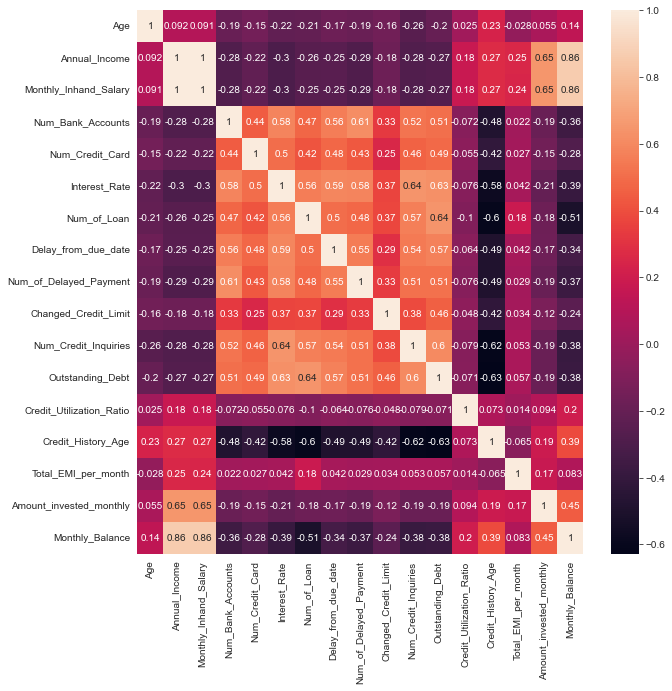

In [52]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True)

***The Inferences from the above Correlation Heatmap are:***
1. From the above there is high correlation from Annual_Income and Monthly Inhand Salary. So it would be appropriate the Annual Income column
2. The negative relation between Credit History Age with the Outstanding Debt,Number Of Credit Inquiries,Interest Rate meaning if a person has High credit History it would lead to lower Interest Rate as their would be much more information available(In my opinion)
3. The high correlation between Monthly Balance and Monthly_Inhand_Salary, So higher the salary higher would be monthly Balance
4. One unqiue information seems to be the Higher Number of Bank Accounts lead Higher Number of Delayed Payments

In [53]:
data.drop(['Annual_Income'],axis=1,inplace=True)

In [54]:
data.head()

,Customer_ID,Age,Occupation,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
ID,,,,,,,,,,,,,,,,,,,,,,,
0x1602,CUS_0xd40,23.0,Scientist,1824.843333,3.0,4.0,3.0,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,6.5,11.27,4.0,Good,809.98,26.822620,22.083333,No,49.574949,81.057408,High_spent_Small_value_payments,321.851976,Good
0x1603,CUS_0xd40,23.0,Scientist,1824.843333,3.0,4.0,3.0,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1.0,6.5,11.27,4.0,Good,809.98,31.944960,22.166667,No,49.574949,81.057408,Low_spent_Large_value_payments,321.851976,Good
0x1604,CUS_0xd40,23.0,Scientist,1824.843333,3.0,4.0,3.0,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,6.5,11.27,4.0,Good,809.98,28.609352,22.250000,No,49.574949,81.057408,Low_spent_Medium_value_payments,321.851976,Good
0x1605,CUS_0xd40,23.0,Scientist,1824.843333,3.0,4.0,3.0,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5.0,6.5,6.27,4.0,Good,809.98,31.377862,22.333333,No,49.574949,81.057408,Low_spent_Small_value_payments,321.851976,Good
0x1606,CUS_0xd40,23.0,Scientist,1824.843333,3.0,4.0,3.0,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6.0,6.5,11.27,4.0,Good,809.98,24.797347,22.416667,No,49.574949,81.057408,High_spent_Medium_value_payments,321.851976,Good


In [55]:
#The correlation between Monthly_Balance and Monthly_inhand_Salary could be seen.
#I would try to create a feature which would be the ratio of total monthly balance and monthly inland salary


data['Bal/Salary']=data.Monthly_Balance/data.Monthly_Inhand_Salary
data.drop(['Monthly_Balance'],axis=1,inplace=True)

In [56]:
data.head(20)

,Customer_ID,Age,Occupation,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Credit_Score,Bal/Salary
ID,,,,,,,,,,,,,,,,,,,,,,,
0x1602,CUS_0xd40,23.0,Scientist,1824.843333,3.0,4.0,3.0,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,6.5,11.27,4.0,Good,809.98,26.822620,22.083333,No,49.574949,81.057408,High_spent_Small_value_payments,Good,0.176372
0x1603,CUS_0xd40,23.0,Scientist,1824.843333,3.0,4.0,3.0,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1.0,6.5,11.27,4.0,Good,809.98,31.944960,22.166667,No,49.574949,81.057408,Low_spent_Large_value_payments,Good,0.176372
0x1604,CUS_0xd40,23.0,Scientist,1824.843333,3.0,4.0,3.0,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,6.5,11.27,4.0,Good,809.98,28.609352,22.250000,No,49.574949,81.057408,Low_spent_Medium_value_payments,Good,0.176372
0x1605,CUS_0xd40,23.0,Scientist,1824.843333,3.0,4.0,3.0,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5.0,6.5,6.27,4.0,Good,809.98,31.377862,22.333333,No,49.574949,81.057408,Low_spent_Small_value_payments,Good,0.176372
0x1606,CUS_0xd40,23.0,Scientist,1824.843333,3.0,4.0,3.0,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6.0,6.5,11.27,4.0,Good,809.98,24.797347,22.416667,No,49.574949,81.057408,High_spent_Medium_value_payments,Good,0.176372
0x1607,CUS_0xd40,23.0,Scientist,1824.843333,3.0,4.0,3.0,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",8.0,6.5,9.27,4.0,Good,809.98,27.262259,22.500000,No,49.574949,81.057408,High_spent_Medium_value_payments,Good,0.176372
0x1608,CUS_0xd40,23.0,Scientist,1824.843333,3.0,4.0,3.0,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,6.5,11.27,4.0,Good,809.98,22.537593,22.583333,No,49.574949,81.057408,Low_spent_Small_value_payments,Good,0.176372
0x1609,CUS_0xd40,23.0,Scientist,1824.843333,3.0,4.0,3.0,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,6.5,11.27,4.0,Good,809.98,23.933795,22.666667,No,49.574949,81.057408,High_spent_Medium_value_payments,Standard,0.176372
0x160e,CUS_0x21b1,28.0,Teacher,3037.986667,2.0,4.0,6.0,1,Credit-Builder Loan,3.0,2.0,5.42,2.0,Good,605.03,24.464031,26.083333,No,18.816215,84.704001,Low_spent_Small_value_payments,Standard,0.153415


In [57]:
categ_cols=data.select_dtypes(include=['object']).columns

#Label Encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()


for i in categ_cols:
    data[i]=le.fit_transform(data[i])
    

In [58]:
data.dtypes

Customer_ID                   int64
Age                         float64
Occupation                    int64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts           float64
Num_Credit_Card             float64
Interest_Rate               float64
Num_of_Loan                   int64
Type_of_Loan                  int64
Delay_from_due_date         float64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                    int64
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age          float64
Payment_of_Min_Amount         int64
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour             int64
Credit_Score                  int64
Bal/Salary                  float64
dtype: object

In [59]:
y=data.Credit_Score
X=data.drop(['Credit_Score'],axis=1)

<AxesSubplot:xlabel='Credit_Score', ylabel='count'>

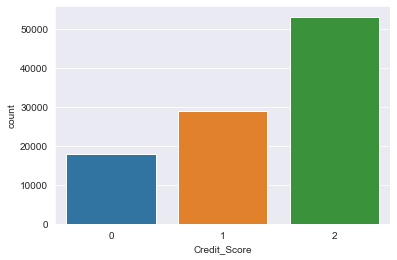

In [60]:
sns.countplot(y)

#### Seems to be an imbalanced dataset Hence need to be cautious of it while building model and using F1-score

In [61]:
def XGB_feature_selection(X,y):
    from sklearn.metrics import f1_score
    def f1_score(pred,dtrain):
        labels=dtrain.get_labels()
        pred_class=[np.argmax(i) for i in pred]
        return 'f1_macro',f1_score(labels,pred_class,average='macro')
    
    xgb_params={
        'eta':0.05,
        'max_depth':10,
        'subsample':0.5,
        'colsample_bytree':0.6,
        'objective':'multi:softmax',
        'num_class':len(np.unique(y))
    }
    
    import xgboost as xgb
    
    dtrain=xgb.DMatrix(X,y,feature_names=X.columns.values)
    model=xgb.train(dict(xgb_params),dtrain,num_boost_round=10,feval=f1_score,maximize=True)
    return model

    
    
    
    
    

In [62]:
xgb_selection=XGB_feature_selection(X,y)

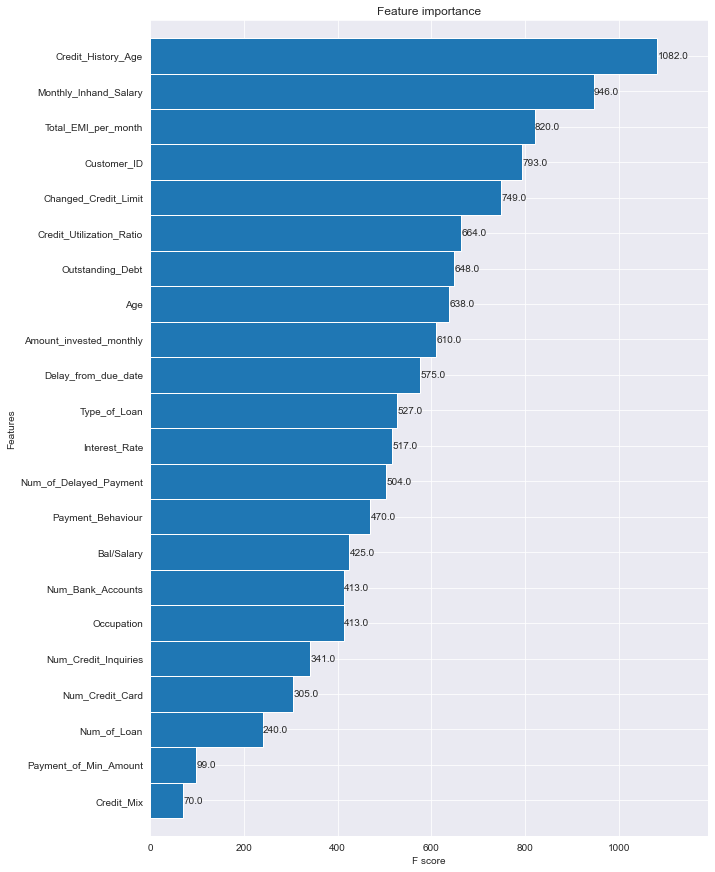

In [63]:
import xgboost as xgb
fig,ax=plt.subplots(figsize=(10,15))
xgb.plot_importance(xgb_selection,height=1,ax=ax)
plt.show()

In [64]:
data['Credit_Score'].value_counts()

2    53174
1    28998
0    17828
Name: Credit_Score, dtype: int64

In [65]:
from sklearn.utils import compute_class_weight
class_weights=compute_class_weight(class_weight='balanced',classes=[0,1,2],y=y)

In [66]:
weight=class_weights.tolist()
weight_dict={}

for i in range(len(weight)):
    weight_dict[i]=weight[i]
    
    
    
weight_dict  

{0: 1.869718046518585, 1: 1.1495045635331171, 2: 0.6268727824375321}

***Splitting the data***

In [67]:

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)



***Random Forest Model***


In [68]:

from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(class_weight=weight_dict,max_depth=10,n_estimators=100)
rf.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 1.869718046518585,
                                     1: 1.1495045635331171,
                                     2: 0.6268727824375321},
                       max_depth=10)

In [69]:
y_pred=rf.predict(X_test)

In [70]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.52      0.83      0.64      3589
           1       0.66      0.80      0.72      5826
           2       0.86      0.59      0.70     10585

    accuracy                           0.69     20000
   macro avg       0.68      0.74      0.69     20000
weighted avg       0.74      0.69      0.69     20000



***KNN Classifier***

In [71]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [72]:
y_pred2=knn.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.74      0.78      0.76      3589
           1       0.78      0.84      0.81      5826
           2       0.83      0.78      0.80     10585

    accuracy                           0.80     20000
   macro avg       0.78      0.80      0.79     20000
weighted avg       0.80      0.80      0.80     20000



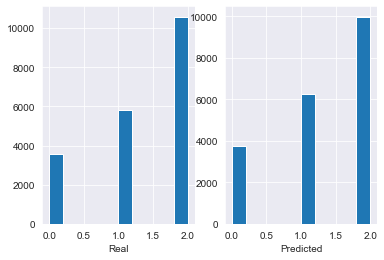

In [81]:
plt.subplot(1,2,1)
plt.hist(y_test)
plt.xlabel('Real')
plt.subplot(1,2,2)
plt.hist(y_pred2)
plt.xlabel('Predicted')
plt.show()

***XG Boost***

In [73]:
from xgboost import XGBClassifier
xg=XGBClassifier(eta=0.05,max_depth=10,subsample=0.5,colsample_bytree=0.6,objective='multi:softmax',
                 class_weight=weight_dict,num_class=len(np.unique(y_test)))

In [74]:
xg.fit(X_train,y_train)
y_pred_xg=xg.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_xg))

[21:28:36] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "class_weight" } are not used.

              precision    recall  f1-score   support

           0       0.69      0.76      0.72      3589
           1       0.79      0.78      0.78      5826
           2       0.81      0.79      0.80     10585

    accuracy                           0.78     20000
   macro avg       0.76      0.78      0.77     20000
weighted avg       0.78      0.78      0.78     20000



### KNN Classifier seems to be performing the best due to its ability of Clustering in my opinion.